In [1]:
# Import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as smf

In [5]:
df=pd.read_csv("bank_data.csv")

In [7]:
df.head(5)

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male


In [8]:
df.info

<bound method DataFrame.info of         id  expected_recovery_amount  actual_recovery_amount  \
0     2030                       194              263.540000   
1     1150                       486              416.090000   
2      380                       527              429.350000   
3     1838                       536              296.990000   
4     1995                       541              346.385000   
...    ...                       ...                     ...   
1877   361                      9785            15388.195990   
1878   196                      9857             9709.909257   
1879   313                      9859            30209.181790   
1880  1781                      9920            20386.232190   
1881   522                      9964            16706.305920   

     recovery_strategy  age     sex  
0     Level 0 Recovery   19    Male  
1     Level 0 Recovery   25  Female  
2     Level 0 Recovery   27    Male  
3     Level 0 Recovery   25    Male  
4     Lev

Text(0.5, 1.0, 'Age vs Expected Recovery')

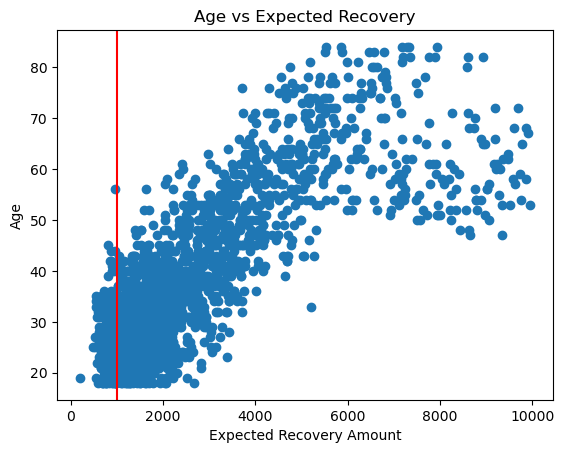

In [46]:
# Scatter plot of age vs expected recovery  
plt.scatter(df['expected_recovery_amount'], df['age'])
plt.axvline(1000, color='r')
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Age')
plt.title('Age vs Expected Recovery')

In [47]:
# Test age difference around threshold
df_below = df[df['expected_recovery_amount'] < 1000]
df_above = df[df['expected_recovery_amount'] >= 1000]
mean_below = df_below['age'].mean()
mean_above = df_above['age'].mean() 
print(stats.ttest_ind(df_below['age'], df_above['age']))

Ttest_indResult(statistic=-13.726414109834245, pvalue=6.192447721152697e-41)


Text(0.5, 1.0, 'Actual vs Expected Recovery')

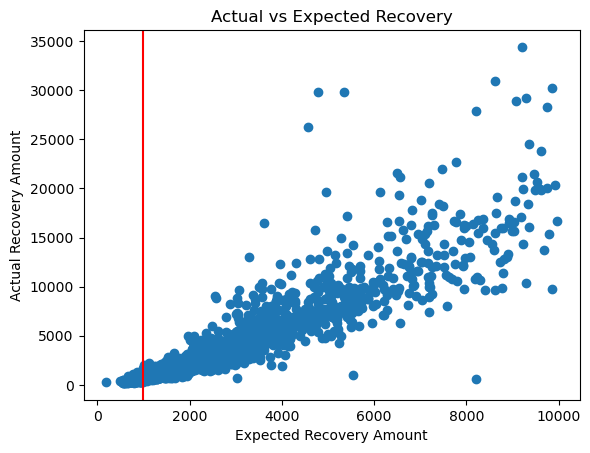

In [48]:
# Scatter plot actual vs expected recovery  
plt.scatter(df['expected_recovery_amount'], df['actual_recovery_amount'])
plt.axvline(1000, color='r') 
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Actual Recovery Amount')
plt.title('Actual vs Expected Recovery')

In [53]:
# Take subsample below and above threshold 
df_below = df[df['expected_recovery_amount'] < 1000]
df_above = df[df['expected_recovery_amount'] >= 1000]

# Compare means  
mean_below = df_below['actual_recovery_amount'].mean()
mean_above = df_above['actual_recovery_amount'].mean()

# T-test  
print(stats.ttest_ind(df_below['actual_recovery_amount'], 
                      df_above['actual_recovery_amount']))

Ttest_indResult(statistic=-13.393755603137897, pvalue=3.854309953797875e-39)


In [49]:
# Linear model  
model = smf.ols('actual_recovery_amount ~ expected_recovery_amount', data=df).fit()
print(model.summary()) 

                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.817
Model:                                OLS   Adj. R-squared:                  0.817
Method:                     Least Squares   F-statistic:                     8378.
Date:                    Sun, 21 Jan 2024   Prob (F-statistic):               0.00
Time:                            23:48:15   Log-Likelihood:                -16936.
No. Observations:                    1882   AIC:                         3.388e+04
Df Residuals:                        1880   BIC:                         3.389e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [50]:

# Model with threshold indicator
df['above_threshold'] = (df['expected_recovery_amount']>=1000).astype(int)  
model = smf.ols('actual_recovery_amount ~ expected_recovery_amount + above_threshold', data=df).fit()
print(model.params)

Intercept                  -1202.842635
expected_recovery_amount       2.087442
above_threshold             -641.285850
dtype: float64


In [51]:
# Baseline model from $900 to $1100
mask = (df['expected_recovery_amount'] > 900) & (df['expected_recovery_amount'] <= 1100)
df_base = df.loc[mask]

base_model = smf.ols('actual_recovery_amount ~ expected_recovery_amount + above_threshold', data=df_base).fit()

print(base_model.params)

# Model from $950 to $1050
mask = (df['expected_recovery_amount'] > 950) & (df['expected_recovery_amount'] <= 1050)  
df_narrow = df.loc[mask]

narrow_model = smf.ols('actual_recovery_amount ~ expected_recovery_amount + above_threshold', data=df_narrow).fit()

print(narrow_model.params)

Intercept                   162.569509
expected_recovery_amount      0.478394
above_threshold             288.297181
dtype: float64
Intercept                  -625.851512
expected_recovery_amount      1.268996
above_threshold             273.776809
dtype: float64
